<a href="https://colab.research.google.com/github/carlomagnani/Stock-Price-Forecaster/blob/main/LSTM_Model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

print("Tensorflow version: "+tf.__version__)

#! pip install pmdarima

# Google file system
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

drive.mount('/GoogleDrive', force_remount=True)

import math



Tensorflow version: 2.8.0
Mounted at /GoogleDrive


In [ ]:
file_2 =   "/GoogleDrive/My Drive/S&P.xlsx"
dataset = pd.read_excel(file_2, sheet_name="ts")

dataset['log_value'] = np.log(dataset['time'])

dataset['lead_ret'] = dataset['log_value'].shift(-1)

dataset.dropna(inplace = True)

model_df = dataset[['log_value', 'lead_ret']]

values = model_df.values
n_train_hours = len(model_df) * 0.8
n_test_hours = len(model_df)*0.19

n_train_hours = round(n_train_hours)
n_test_hours = n_train_hours + round(n_test_hours)

train = values[:n_train_hours, :]
test = values[n_train_hours:n_test_hours, :]
validation = values[n_test_hours:, :]

# Creating a data structure with 60 time-steps and 1 output
train_X = []
train_y = []

for i in range(60, len(train)):
    train_X.append(train[i-60:i, 0])
    train_y.append(train[i, 1])

train_X, train_y = np.array(train_X), np.array(train_y)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

test_X = []
test_y = []

for i in range(60, len(test)):
  test_X.append(test[i-60:i, 0])
  test_y.append(test[i, 1])

test_X, test_y = np.array(test_X), np.array(test_y)

test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

validation_X = []
validation_y = []

for i in range(60, len(validation)):
  validation_X.append(validation[i-60:i, 0])
  validation_y.append(validation[i, 1])

validation_X, validation_y = np.array(validation_X), np.array(validation_y)

validation_X = np.reshape(validation_X, (validation_X.shape[0],validation_X.shape[1],1))


print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, validation_X.shape, validation_y.shape)

#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



(18869, 60, 1) (18869,) (4436, 60, 1) (4436,) (176, 60, 1) (176,)


In [ ]:
file_2 =   "/GoogleDrive/My Drive/S&P.xlsx"
dataset = pd.read_excel(file_2, sheet_name="ts")

dataset['log_value'] = np.log(dataset['time'])

dataset['lead_ret'] = dataset['log_value'].shift(-1)

dataset['log_ret'] = dataset['log_value'] - dataset['log_value'].shift(+1)

dataset['lead_ret'] = dataset['log_ret'].shift(-1)

dataset.dropna(inplace = True)

model_df = dataset[['log_ret', 'lead_ret']]

values = model_df.values
n_train_hours = len(model_df) * 0.8
n_test_hours = len(model_df)*0.19

n_train_hours = round(n_train_hours)
n_test_hours = n_train_hours + round(n_test_hours)

train = values[:n_train_hours, :]
test = values[n_train_hours:n_test_hours, :]
validation = values[n_test_hours:, :]

# Creating a data structure with 60 time-steps and 1 output
train_X = []
train_y = []

for i in range(60, len(train)):
    train_X.append(train[i-60:i, 0])
    train_y.append(train[i, 1])

train_X, train_y = np.array(train_X), np.array(train_y)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

test_X = []
test_y = []

for i in range(60, len(test)):
  test_X.append(test[i-60:i, 0])
  test_y.append(test[i, 1])

test_X, test_y = np.array(test_X), np.array(test_y)

test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

validation_X = []
validation_y = []

for i in range(60, len(validation)):
  validation_X.append(validation[i-60:i, 0])
  validation_y.append(validation[i, 1])

validation_X, validation_y = np.array(validation_X), np.array(validation_y)

validation_X = np.reshape(validation_X, (validation_X.shape[0],validation_X.shape[1],1))


print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, validation_X.shape, validation_y.shape)

#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(18869, 60, 1) (18869,) (4436, 60, 1) (4436,) (176, 60, 1) (176,)


In [ ]:
train_X.shape

(14190, 5, 1)

Epoch 1/50
590/590 - 20s - loss: 0.5487 - val_loss: 0.5254 - 20s/epoch - 34ms/step
Epoch 2/50
590/590 - 18s - loss: 0.2099 - val_loss: 0.3162 - 18s/epoch - 30ms/step
Epoch 3/50
590/590 - 18s - loss: 0.1764 - val_loss: 0.2754 - 18s/epoch - 31ms/step
Epoch 4/50
590/590 - 18s - loss: 0.1664 - val_loss: 0.2311 - 18s/epoch - 30ms/step
Epoch 5/50
590/590 - 18s - loss: 0.1580 - val_loss: 0.2320 - 18s/epoch - 30ms/step
Epoch 6/50
590/590 - 18s - loss: 0.1497 - val_loss: 0.2362 - 18s/epoch - 30ms/step
Epoch 7/50
590/590 - 18s - loss: 0.1431 - val_loss: 0.2524 - 18s/epoch - 30ms/step
Epoch 8/50
590/590 - 19s - loss: 0.1360 - val_loss: 0.2347 - 19s/epoch - 32ms/step
Epoch 9/50
590/590 - 18s - loss: 0.1299 - val_loss: 0.2310 - 18s/epoch - 30ms/step
Epoch 10/50
590/590 - 18s - loss: 0.1248 - val_loss: 0.2360 - 18s/epoch - 30ms/step
Epoch 11/50
590/590 - 18s - loss: 0.1194 - val_loss: 0.2377 - 18s/epoch - 30ms/step
Epoch 12/50
590/590 - 18s - loss: 0.1129 - val_loss: 0.2244 - 18s/epoch - 30ms/step
E

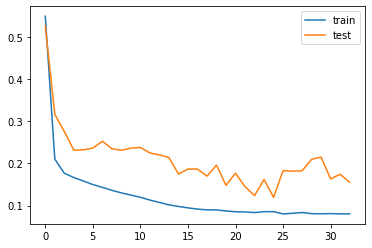

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=8, min_delta=0.001)

model = Sequential()

model.add(LSTM(60, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.3))

#model.add(LSTM(10, return_sequences=True))
#model.add(Dropout(0.3))

#model.add(LSTM(20, return_sequences=False))
#model.add(Dropout(0.3))

model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data = (test_X, test_y), verbose=2, shuffle=False, callbacks=[early_stopping])
#history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data = (test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Validation RMSE: 0.602


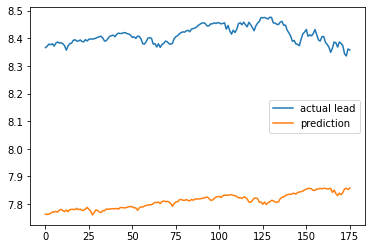

In [ ]:
from sklearn.metrics import mean_squared_error

yhat = model.predict(validation_X)

yhat = yhat.reshape(yhat.shape[0],yhat.shape[1])

validation_y = validation_y.reshape(validation_y.shape[0],1)



# calculate RMSE
#rmse = math.sqrt(mean_squared_error(, ))
#print('Validation RMSE: %.3f' % rmse)

predictions = pd.DataFrame()

predictions['pred'] = pd.DataFrame(yhat).iloc[:,0]
predictions['act'] = pd.DataFrame(validation_y).iloc[:,0]


# calculate RMSE
rmse = math.sqrt(mean_squared_error(predictions['act'].tolist(),predictions['pred'].tolist() ))
print('Validation RMSE: %.3f' % rmse)


plt.plot(predictions['act'], label='actual lead')
plt.plot(predictions['pred'], label='prediction')
##plt.plot(predictions['difference'])
plt.legend()


In [ ]:
dataset['log_value'] = np.log(dataset['time'])

dataset['lead_ret'] = dataset['log_value'].shift(-1)

dataset['log_ret'] = dataset['log_value'] - dataset['log_value'].shift(+1)

dataset['lead_ret'] = dataset['log_ret'].shift(-1)

dataset.head()

,date,time,log_value,lead_ret,log_ret
0,1927-12-30,17.66,2.871302,0.005647,NaN
1,1928-01-03,17.76,2.876949,-0.002255,0.005647
2,1928-01-04,17.72,2.874694,-0.009640,-0.002255
3,1928-01-05,17.55,2.865054,0.006248,-0.009640
4,1928-01-06,17.66,2.871302,-0.009101,0.006248
